Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#displaying first 5 rows
data=pd.read_csv("/content/drive/My Drive/NIPS_1987-2015.csv")
data.head()

,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,1987_11,1987_12,1987_13,1987_14,1987_15,1987_16,1987_17,1987_18,1987_19,1987_20,1987_21,1987_22,1987_23,1987_24,1987_25,1987_26,1987_27,1987_28,1987_29,1987_30,1987_31,1987_32,1987_33,1987_34,1987_35,1987_36,1987_37,1987_38,1987_39,...,2015_364,2015_365,2015_366,2015_367,2015_368,2015_369,2015_370,2015_371,2015_372,2015_373,2015_374,2015_375,2015_376,2015_377,2015_378,2015_379,2015_380,2015_381,2015_382,2015_383,2015_384,2015_385,2015_386,2015_387,2015_388,2015_389,2015_390,2015_391,2015_392,2015_393,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,1987_10,1987_11,1987_12,1987_13,1987_14,1987_15,1987_16,1987_17,1987_18,1987_19,1987_20,1987_21,1987_22,1987_23,1987_24,1987_25,1987_26,1987_27,1987_28,1987_29,1987_30,1987_31,1987_32,1987_33,1987_34,1987_35,1987_36,1987_37,1987_38,1987_39,1987_40,...,2015_364,2015_365,2015_366,2015_367,2015_368,2015_369,2015_370,2015_371,2015_372,2015_373,2015_374,2015_375,2015_376,2015_377,2015_378,2015_379,2015_380,2015_381,2015_382,2015_383,2015_384,2015_385,2015_386,2015_387,2015_388,2015_389,2015_390,2015_391,2015_392,2015_393,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
count,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,...,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000
mean,0.068656,0.189043,0.102155,0.138009,0.198465,0.086278,0.169240,0.122481,0.161563,0.132164,0.174998,0.213993,0.185292,0.086714,0.105731,0.128413,0.078601,0.147082,0.100846,0.097706,0.130158,0.082439,0.058449,0.150571,0.090901,0.104510,0.152578,0.103812,0.108436,0.075722,0.090727,0.087673,0.121609,0.081218,0.385327,0.173340,0.094478,0.144203,0.148565,0.149525,...,0.152142,0.220885,0.218965,0.187560,0.209195,0.201867,0.214167,0.203001,0.235104,0.223589,0.158684,0.195760,0.233621,0.204746,0.228300,0.184768,0.201431,0.190352,0.220797,0.184332,0.217395,0.192358,0.220536,0.221146,0.209893,0.157027,0.209631,0.232749,0.187211,0.195586,0.185990,0.179883,0.129634,0.218093,0.186513,0.193143,0.133822,0.186775,0.182326,0.178836
std,0.582488,1.141657,0.836137,1.020881,1.242443,0.582091,1.286809,1.159653,1.163961,0.998724,1.289968,1.718297,1.565597,0.833128,0.748164,1.067883,0.827896,1.160630,1.049442,0.807970,0.875011,0.535357,0.508078,1.135864,0.685065,0.741896,0.932186,0.567120,0.877222,0.643361,0.697207,0.657088,0.912814,0.620520,2.334955,1.287246,0.690608,1.520253,1.099642,1.231377,...,1.290296,1.924747,1.595732,1.335029,1.460118,1.627844,1.694501,1.963073,1.806109,1.655138,1.051142,1.457857,1.933693,1.492155,1.621633,1.745664,1.472895,1.293470,1.404624,1.160235,1.886508,1.637675,2.050456,1.892007,1.531186,1.078467,1.700925,1.788284,1.517945,1.427828,1.471045,1.272883,1.082102,1.640919,1.093565,1.262328,1.027739,1.469907,1.305631,1.243001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [5]:
data.isnull().sum()

Unnamed: 0    2
1987_1        0
1987_2        0
1987_3        0
1987_4        0
             ..
2015_399      0
2015_400      0
2015_401      0
2015_402      0
2015_403      0
Length: 5812, dtype: int64

In [6]:
data=data.drop(['Unnamed: 0'],axis=1)

In [7]:
data.isnull().sum()

1987_1      0
1987_2      0
1987_3      0
1987_4      0
1987_5      0
           ..
2015_399    0
2015_400    0
2015_401    0
2015_402    0
2015_403    0
Length: 5811, dtype: int64

The **KMeans algorithm** clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the **inertia** or within-cluster sum-of-squares (see below). This algorithm requires the number of **clusters** to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.


The k-means algorithm divides a *N* set of *X*  samples  into *K* disjoint clusters *C* , each described by the mean <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x3BC;</mi>
    <mi>j</mi>
  </msub>
</math> 
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from X , although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

 
 


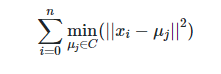

**Inertia** can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

* Inertia makes the assumption that clusters are convex and isotropic, which is 
not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.


* Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.



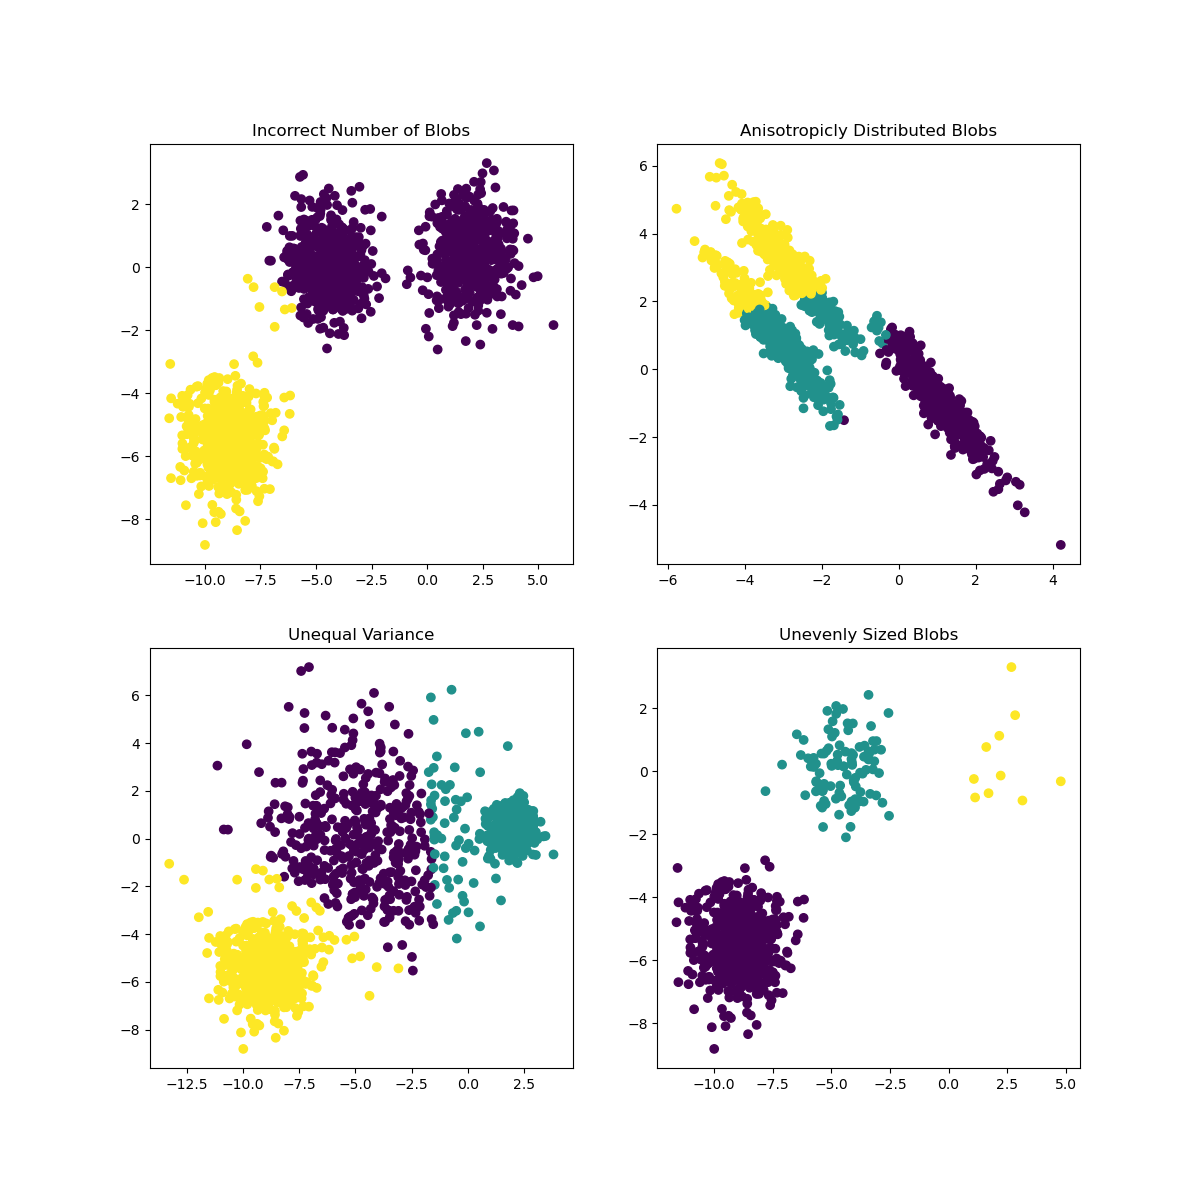

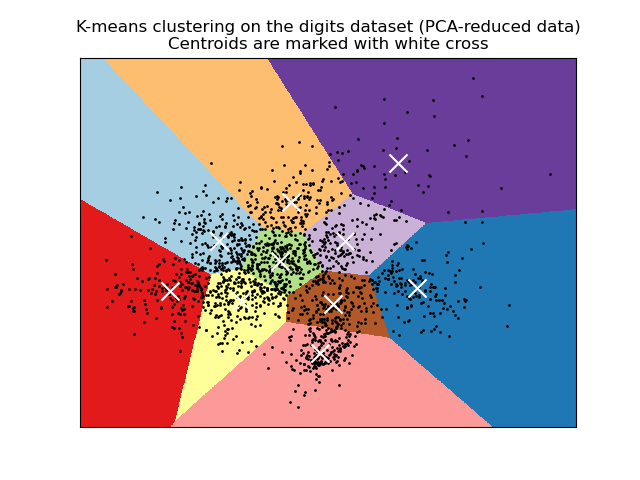

**Methodology**

Step 1: Choose the number of clusters k

Step 2: Select k random points from the data as centroids

Step 3: Assign all the points to the closest cluster centroid

Step 4: Recompute the centroids of newly formed clusters

Step 5: Repeat steps 3 and 4

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')

In [10]:
# fitting the k means algorithm on data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# inertia on the fitted data
kmeans.inertia_

100557364.67420037

In [ ]:
#fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
  kmeans.fit(data)
  SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

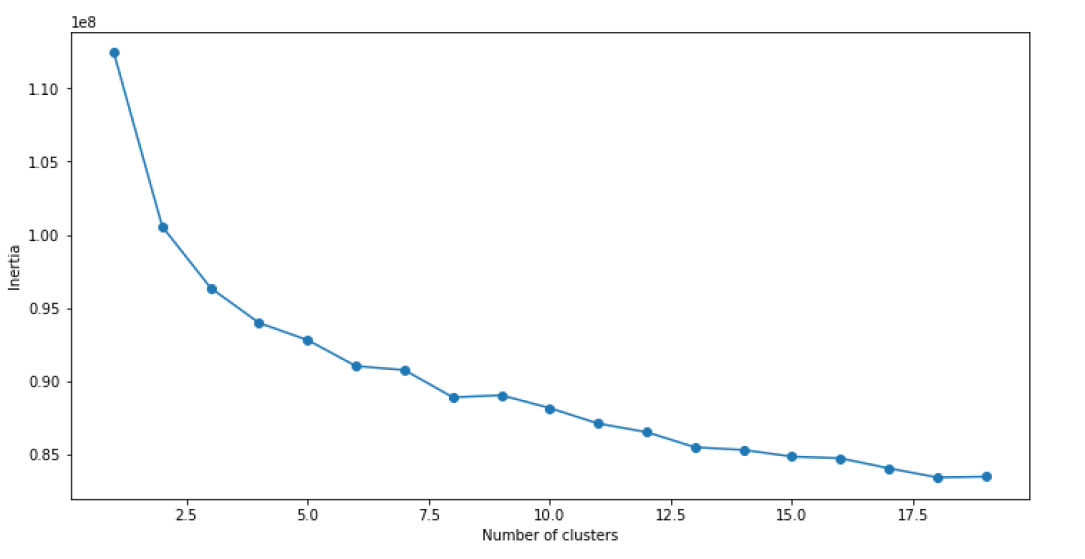

The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.You must also look at the computation cost while deciding the number of clusters. If we increase the number of clusters, the computation cost will also
increase.

Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. Let’s set the number of clusters as 6 and fit the model:

In [14]:
#k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data)
pred = kmeans.predict(data)

Finally, let’s look at the value count of points in each of the above-formed clusters:

In [15]:
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    10639
4      683
2      110
1       26
3        3
5        2
Name: cluster, dtype: int64

So, there are 10639 data points belonging to cluster 1 (index 0), then 683 points in cluster 2 (index 4), and so on. This is how we can implement K-Means Clustering .